# Detect Credit Card Fraud

In [1]:
#install libaries
!pip install pytorch-tabnet

  Using cached pytorch_tabnet-3.1.1-py3-none-any.whl (39 kB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.3.0 requires importlib-resources, which is not installed.
tensorflow-datasets 4.3.0 requires promise, which is not installed.
tensorflow-datasets 4.3.0 requires tensorflow-metadata, which is not installed.
kaggle 1.5.12 requires python-slugify, which is not installed.
You should consider upgrading via the 'c:\users\ampad\anaconda3\envs\od\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)


You should consider upgrading via the 'c:\users\ampad\anaconda3\envs\od\python.exe -m pip install --upgrade pip' command.


In [7]:
#import neccesary libraries
import pandas as pd
import imblearn
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, recall_score, f1_score, classification_report, accuracy_score,roc_curve, confusion_matrix
pd.set_option('display.max_columns', None)

In [8]:
#import dataset and inspect first 5 rows
credit_card = pd.read_csv('creditcard.csv')
print(credit_card.shape)
credit_card.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
credit_card['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
credit_card['Class'].value_counts()/len(credit_card['Class'])

0    0.998273
1    0.001727
Name: Class, dtype: float64

#### dataset very imbalanced, where there are 99.82% normal transcations, and only 0.1% fraudlent cases,  and needs to be fixed

In [11]:
X = credit_card.drop(columns='Class')
y = credit_card['Class']

In [12]:
print('Original dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({0: 284315, 1: 492})


In [13]:
#adasyn to balance the dataset
ada = ADASYN(random_state=0)
X_res, y_res = ada.fit_resample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 284315, 1: 284298})


In [14]:
#70-30% split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res, test_size=0.3, random_state=0)

In [15]:
#scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
#use the logisitic regression classifier as baseline
Lr = LogisticRegression()
Lr.fit(X_train, y_train)
Lr_pred = Lr.predict(X_test)

C:\Users\ampad\anaconda3\envs\OD\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
print('Area under curve score for the logisitc regression model is',roc_auc_score(Lr_pred,y_test))
print('Recall score for the logisitc regression model is',recall_score(Lr_pred,y_test))
print('F1 score score for the logisitc regression model is',f1_score(Lr_pred,y_test))
print('Accuracy score for the logisitc regression model is',accuracy_score(Lr_pred,y_test))

Area under curve score for the logisitc regression model is 0.979339225486751
Recall score for the logisitc regression model is 0.990261023730519
F1 score score for the logisitc regression model is 0.9788982569154983
Accuracy score for the logisitc regression model is 0.9791070674858134


In [18]:
Rf = RandomForestClassifier()
Rf.fit(X_train, y_train)
Rf_pred = Rf.predict(X_test)

In [19]:
print('Area under curve score for the Random Forest model is',roc_auc_score(Rf_pred,y_test))
print('Recall score for the Random Forest model is',recall_score(Rf_pred,y_test))
print('F1 score score for the Random Forest model is',f1_score(Rf_pred,y_test))
print('Accuracy score for the Random Forest model is',accuracy_score(Rf_pred,y_test))

Area under curve score for the Random Forest model is 0.9998946567565986
Recall score for the Random Forest model is 0.9997893135131972
F1 score score for the Random Forest model is 0.9998946456582305
Accuracy score for the Random Forest model is 0.9998944801388172


In [20]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor

In [21]:
#train tabnet model with 20 epochs, and default hyperparameter tuning
clf = TabNetClassifier()
clf.fit(X_train, y_train,eval_set=[(X_test, y_test)],max_epochs=20,patience=20)
tab_pred = clf.predict(X_test)

Device used : cuda
epoch 0  | loss: 0.0937  | val_0_auc: 0.99874 |  0:00:32s
epoch 1  | loss: 0.04145 | val_0_auc: 0.99956 |  0:00:59s
epoch 2  | loss: 0.02974 | val_0_auc: 0.99949 |  0:01:27s
epoch 3  | loss: 0.02828 | val_0_auc: 0.99972 |  0:01:54s
epoch 4  | loss: 0.02062 | val_0_auc: 0.99978 |  0:02:21s
epoch 5  | loss: 0.01931 | val_0_auc: 0.99979 |  0:02:51s
epoch 6  | loss: 0.01639 | val_0_auc: 0.99983 |  0:03:25s
epoch 7  | loss: 0.01435 | val_0_auc: 0.99984 |  0:03:57s
epoch 8  | loss: 0.01343 | val_0_auc: 0.99989 |  0:04:26s
epoch 9  | loss: 0.01341 | val_0_auc: 0.9999  |  0:04:56s
epoch 10 | loss: 0.01157 | val_0_auc: 0.99982 |  0:05:25s
epoch 11 | loss: 0.01069 | val_0_auc: 0.99991 |  0:05:59s
epoch 12 | loss: 0.01211 | val_0_auc: 0.99993 |  0:06:31s
epoch 13 | loss: 0.00965 | val_0_auc: 0.9999  |  0:07:04s
epoch 14 | loss: 0.00848 | val_0_auc: 0.99994 |  0:07:34s
epoch 15 | loss: 0.00878 | val_0_auc: 0.99994 |  0:08:06s
epoch 16 | loss: 0.00859 | val_0_auc: 0.99995 |  0:08

In [22]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, tab_pred)
print('roc_auc_score for TabNet: ', roc_auc_score(y_test, tab_pred))

roc_auc_score for TabNet:  0.9984742573173648


In [23]:
#metrics to evaluate the tabnet model
print('Area under curve score for the logisitc regression model is',roc_auc_score(tab_pred,y_test))
print('Recall score for the logisitc regression model is',recall_score(tab_pred,y_test))
print('F1 score score for the logisitc regression model is',f1_score(tab_pred,y_test))
print('Accuracy score for the logisitc regression model is',accuracy_score(tab_pred,y_test))

Area under curve score for the logisitc regression model is 0.9984796448126104
Recall score for the logisitc regression model is 0.997418194137782
F1 score score for the logisitc regression model is 0.9984796744164288
Accuracy score for the logisitc regression model is 0.9984758242273601


Area under curve for TabNet:  0.9984742573173648


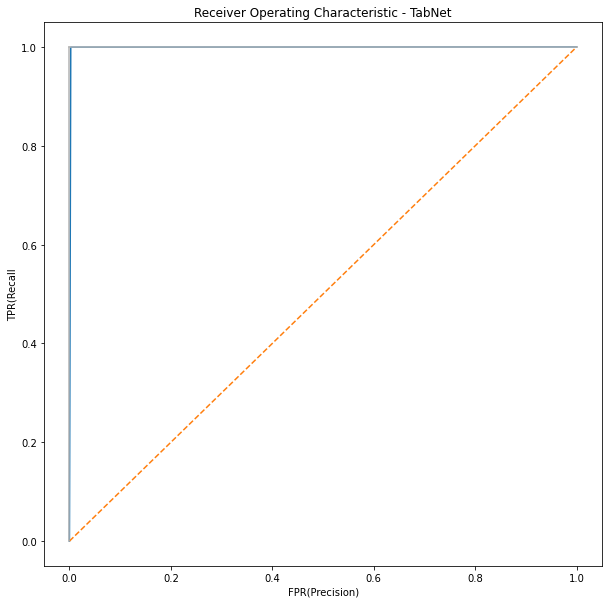

In [24]:
import matplotlib.pyplot as plt
print('Area under curve for TabNet: ', roc_auc_score(y_test, tab_pred))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - TabNet')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('TPR(Recall')
plt.xlabel('FPR(Precision)')
plt.show()  

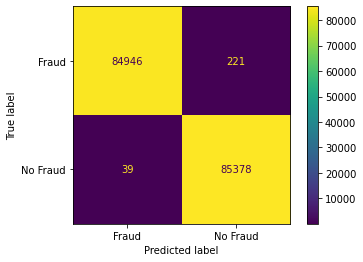

In [25]:
#confusion matrix 
cmd = confusion_matrix(y_test, tab_pred)
cmd = ConfusionMatrixDisplay(cmd, display_labels=['Fraud','No Fraud'])
cmd.plot()

### The model does very well to distinguish between fraudulent activities and normal ones, with only 637 observations(model predicted that it was fraudulent, whiles it was a normal transaction) misclassified, which represents only 0.11%. 

In [26]:
print('Area under curve score for the Tabnet model is',roc_auc_score(tab_pred,y_test))
print('Recall score for the Tabnet regression model is',recall_score(tab_pred,y_test))
print('F1 score score for the Tabnet regression model is',f1_score(tab_pred,y_test))
print('Accuracy score for the Tabnet regression model is',accuracy_score(tab_pred,y_test))

Area under curve score for the Tabnet model is 0.9984796448126104
Recall score for the Tabnet regression model is 0.997418194137782
F1 score score for the Tabnet regression model is 0.9984796744164288
Accuracy score for the Tabnet regression model is 0.9984758242273601


In [27]:
print('Area under curve score for the logisitc regression model is',roc_auc_score(Lr_pred,y_test))
print('Recall score for the logisitc regression model is',recall_score(Lr_pred,y_test))
print('F1 score score for the logisitc regression model is',f1_score(Lr_pred,y_test))
print('Accuracy score for the logisitc regression model is',accuracy_score(Lr_pred,y_test))

Area under curve score for the logisitc regression model is 0.979339225486751
Recall score for the logisitc regression model is 0.990261023730519
F1 score score for the logisitc regression model is 0.9788982569154983
Accuracy score for the logisitc regression model is 0.9791070674858134


In [28]:
model_comp=pd.DataFrame({'Model':['Logistic Regression','TabNet', 'Random Forest'],
             'F1_Score':[f1_score(Lr_pred,y_test),f1_score(tab_pred,y_test), f1_score(Rf_pred,y_test)]})
model_comp.sort_values(by='F1_Score', ascending=False)

,Model,F1_Score
2,Random Forest,0.999895
1,TabNet,0.998480
0,Logistic Regression,0.978898
